In [24]:
!pip install doclayout-yolo rapid_latex_ocr requests ultralytics

  Using cached ultralytics-8.3.225-py3-none-any.whl.metadata (37 kB)
  Using cached polars-1.35.1-py3-none-any.whl.metadata (10 kB)
  Using cached ultralytics_thop-2.0.18-py3-none-any.whl.metadata (14 kB)
  Using cached polars_runtime_32-1.35.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.8 MB/s  0:00:00 eta 0:00:01
Using cached ultralytics_thop-2.0.18-py3-none-any.whl (28 kB)
Using cached polars-1.35.1-py3-none-any.whl (783 kB)
Using cached polars_runtime_32-1.35.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [ultralytics] [ultralytics]


In [1]:
import cv2
from doclayout_yolo import YOLOv10

# Load the pre-trained model
model = YOLOv10("DocLayout-YOLO-DocStructBench/doclayout_yolo_docstructbench_imgsz1024.pt")

from rapid_latex_ocr import LaTeXOCR
model_latex = LaTeXOCR()

/home/alexey/test/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
# Perform prediction
det_res = model.predict(
    #"test_images/t1_page_1.png",   # Image to predict
    "test_images/t3_page_2.png",   # Image to predict
    imgsz=1024,        # Prediction image size
    conf=0.2,          # Confidence threshold
    device="cuda:0"    # Device to use (e.g., 'cuda:0' or 'cpu')
)

# Annotate and save the result
#annotated_frame = det_res[0].plot(pil=True, line_width=5, font_size=20)
#cv2.imwrite("result.jpg", annotated_frame)
det_res[0].save_crop(save_dir="test_output", file_name="detection")



image 1/1 /home/alexey/test/test_images/t3_page_2.png: 1024x736 6 plain texts, 1 abandon, 3 isolate_formulas, 52.3ms
Speed: 6.5ms preprocess, 52.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 736)


In [30]:
from ultralytics import YOLO

model_yolo = YOLO("yolo-doclaynet/yolov12l-doclaynet.pt")
pred = model_yolo.predict(
    #"test_images/t1_page_1.png",   # Image to predict
    "test_images/t3_page_2.png",   # Image to predict
    imgsz=1024,        # Prediction image size
    conf=0.2,          # Confidence threshold
    device="cuda:0"    # Device to use (e.g., 'cuda:0' or 'cpu')
)
pred[0].save_crop(save_dir="test_output1", file_name="detection")


image 1/1 /home/alexey/test/test_images/t3_page_2.png: 1024x736 4 Formulas, 1 Page-footer, 1 Section-header, 5 Texts, 69.7ms
Speed: 4.1ms preprocess, 69.7ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 736)


Processing image: test_output/isolate_formula/detection6.jpg


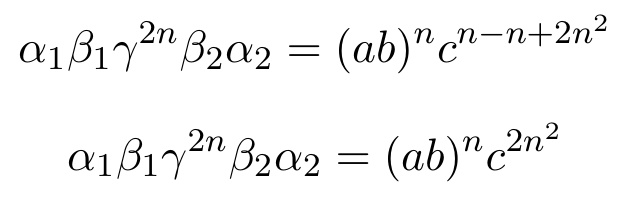

Extracted LaTeX (19.533247453000513): \begin{array}{c}{{Q_{1}\beta_{1}\gamma^{2n}\beta_{2}\alpha_{2}\implies\left({a b}\right)^{n}c^{n-n+2n^{2}}}}\\ {{\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\left(\qquad\qquad\qquad\left(1}\qquad\qquad\

<IPython.core.display.Math object>

Processing image: test_output/isolate_formula/detection7.jpg


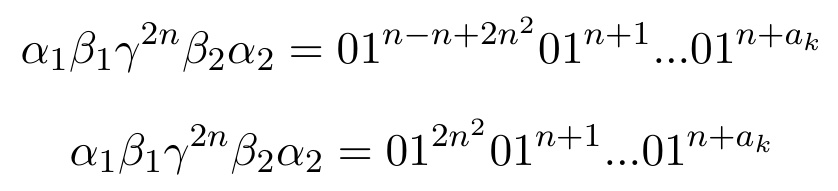

Extracted LaTeX (3.2768733439988864): \begin{array}{c}{{\displaystyle Q_{1}\beta_{1}\gamma^{2n}\beta_{2}{\cal Q}_{2}\Longrightarrow(\displaystyle0){}^{n-n+2n^{2}}(\displaystyle0){}^{n+1}...0{}^{1}}}\\ {{\displaystyle Q_{1}\beta_{1}\gamma^{2n}\beta_{2}{\cal Q}_{2}{\cal Q}_{2}\ =0{}^{2n^{2}}(\displaystyle01^{n+a_{k}})}}\end{array}


<IPython.core.display.Math object>

Processing image: test_output/isolate_formula/detection8.jpg


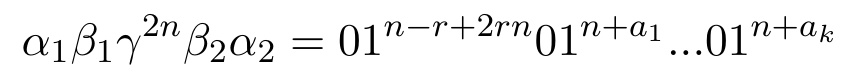

Extracted LaTeX (2.323934305997682): \alpha_{1}\beta_{1}\gamma^{2n}\beta_{2}\alpha_{2}=01^{n-r+2r n}\bar{\Pi}_{n+a_{1}}^{n+a_{1}}...\bar{\Omega}_{n+a_{k}}^{n+a_{1}}\psi^{n+a_{1}}\psi^{n+a_{k}}\psi_{k}\psi_{k}\psi_{k}\psi_{k}\psi_{k}}^{n+a_{1}}


<IPython.core.display.Math object>

Processing image: test_output/isolate_formula/detection4.jpg


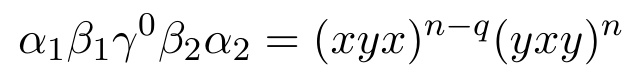

Extracted LaTeX (1.0681230219997815): {\cal Q}(t)\partial_{1}\cap\overset{0}{\sim}\emptyset\triangle\ A\stackrel{\leftarrow}{\longrightarrow}\Big(\mathcal{D}\mathcal{D}\Big)^{n-q}\Big(\mathcal{U}\mathcal{D}\mathcal{U}\Big)^{n}


<IPython.core.display.Math object>

Processing image: test_output/isolate_formula/detection10.jpg


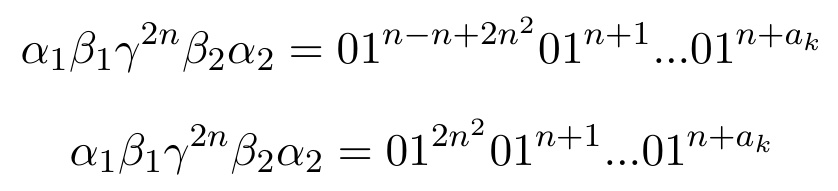

Extracted LaTeX (3.3687234860008175): \begin{array}{c}{{\displaystyle Q_{1}\beta_{1}\gamma^{2n}\beta_{2}{\cal Q}_{2}\Longrightarrow(\displaystyle0){}^{n-n+2n^{2}}(\displaystyle0){}^{n+1}...0{}^{1}}}\\ {{\displaystyle Q_{1}\beta_{1}\gamma^{2n}\beta_{2}{\cal Q}_{2}{\cal Q}_{2}\ =0{}^{2n^{2}}(\displaystyle01^{n+a_{k}})}}\end{array}


<IPython.core.display.Math object>

Processing image: test_output/isolate_formula/detection12.jpg


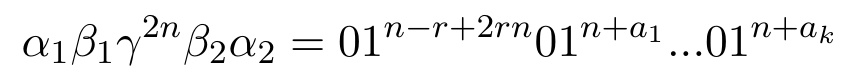

Extracted LaTeX (2.358748757000285): \alpha_{1}\beta_{1}\gamma^{2n}\beta_{2}\alpha_{2}=01^{n-r+2r n}\bar{\Pi}_{n+a_{1}}^{n+a_{1}}...\bar{\Omega}_{n+a_{k}}^{n+a_{1}}\psi^{n+a_{1}}\psi^{n+a_{k}}\psi_{k}\psi_{k}\psi_{k}\psi_{k}\psi_{k}}^{n+a_{1}}


<IPython.core.display.Math object>

Processing image: test_output/isolate_formula/detection5.jpg


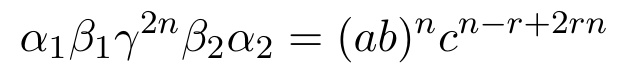

Extracted LaTeX (0.9837039719968743): {\cal Q}_{1}{\beta}_{1}{\gamma}^{2n}{\beta}_{2}{\cal Q}_{2}\longrightarrow\left({\cal Q}{\cal0}\right)^{n}{\cal C}^{n-r+2r n}


<IPython.core.display.Math object>

Processing image: test_output/isolate_formula/detection.jpg


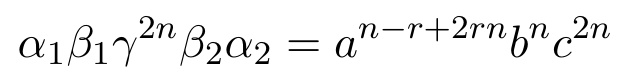

Extracted LaTeX (1.0645921409995935): {\cal Q}_{1}\beta_{1}\gamma^{2n}\beta_{2}{\cal Q}_{2}\underline{{{L}}}\longrightarrow{\cal Q}^{n-r+2r n}\underline{{{B}}}^{n}\underline{{{c}}}^{2n}


<IPython.core.display.Math object>

Processing image: test_output/isolate_formula/detection3.jpg


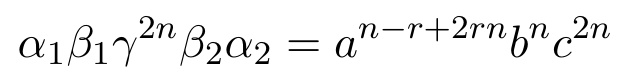

Extracted LaTeX (1.1111247900007584): {\cal Q}_{1}\beta_{1}\gamma^{2n}\beta_{2}{\cal Q}_{2}\underline{{{L}}}\longrightarrow{\cal Q}^{n-r+2r n}\underline{{{B}}}^{n}\underline{{{c}}}^{2n}


<IPython.core.display.Math object>

Processing image: test_output/isolate_formula/detection9.jpg


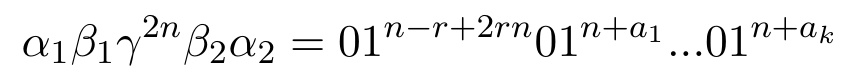

Extracted LaTeX (2.3245568929996807): \alpha_{1}\beta_{1}\gamma^{2n}\beta_{2}\alpha_{2}=01^{n-r+2r n}\bar{\Pi}_{n+a_{1}}^{n+a_{1}}...\bar{\Omega}_{n+a_{k}}^{n+a_{1}}\psi^{n+a_{1}}\psi^{n+a_{k}}\psi_{k}\psi_{k}\psi_{k}\psi_{k}\psi_{k}}^{n+a_{1}}


<IPython.core.display.Math object>

Processing image: test_output/isolate_formula/detection2.jpg


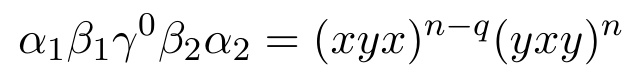

Extracted LaTeX (1.620667457998934): {\cal Q}(t)\partial_{1}\cap\overset{0}{\sim}\emptyset\triangle\ A\stackrel{\leftarrow}{\longrightarrow}\Big(\mathcal{D}\mathcal{D}\Big)^{n-q}\Big(\mathcal{U}\mathcal{D}\mathcal{U}\Big)^{n}


<IPython.core.display.Math object>

Processing image: test_output/isolate_formula/detection11.jpg


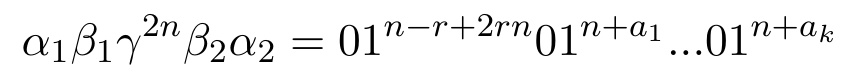

Extracted LaTeX (4.217974356000923): \alpha_{1}\beta_{1}\gamma^{2n}\beta_{2}\alpha_{2}=01^{n-r+2r n}\bar{\Pi}_{n+a_{1}}^{n+a_{1}}...\bar{\Omega}_{n+a_{k}}^{n+a_{1}}\psi^{n+a_{1}}\psi^{n+a_{k}}\psi_{k}\psi_{k}\psi_{k}\psi_{k}\psi_{k}}^{n+a_{1}}


<IPython.core.display.Math object>

In [31]:
from pathlib import Path
from IPython.display import display, Math, Image

for img in list(Path("test_output/isolate_formula").glob("*.jpg")):
    print(f"Processing image: {img}")
    display(Image(img))
    with open(img, "rb") as f:
        data = f.read()
    res, elapse = model_latex(data)
    print(f"Extracted LaTeX ({elapse}): {res}")
    display(Math(res))

Processing image: test_output1/Formula/detection4.jpg


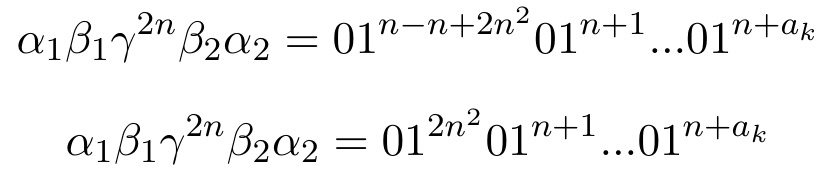

Extracted LaTeX (2.9800546020014735): \begin{array}{c}{{\displaystyle Q_{1}\beta_{1}\gamma^{2n}\beta_{2}{\cal Q}_{2}\Longrightarrow(\displaystyle0){}^{n-n+2n^{2}}(\displaystyle0){}^{n+1}...0{}^{1}}}\\ {{\displaystyle Q_{1}\beta_{1}\gamma^{2n}\beta_{2}{\cal Q}_{2}{\cal Q}_{2}\ =0{}^{2n^{2}}(\displaystyle01^{n+a_{k}})}}\end{array}


<IPython.core.display.Math object>

Processing image: test_output1/Formula/detection.jpg


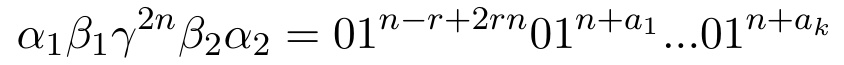

Extracted LaTeX (0.8043548169989663): \alpha_{1}\beta_{1}\gamma^{2n}\beta_{2}\alpha_{2}\equiv01^{n-r+2r n}\bar{\Pi}^{n+a_{1}}...\bar{\Pi}^{n+a_{k}}\,.


<IPython.core.display.Math object>

Processing image: test_output1/Formula/detection3.jpg


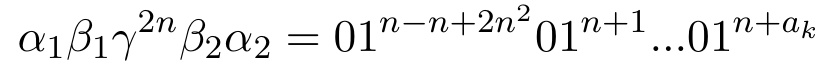

Extracted LaTeX (0.7669783439996536): \alpha_{1}\beta_{1}\gamma^{2n}\beta_{2}\alpha_{2}\ =01^{n-n+2n^{2}}()1^{n+1}...01^{n+a_{k}}


<IPython.core.display.Math object>

Processing image: test_output1/Formula/detection2.jpg


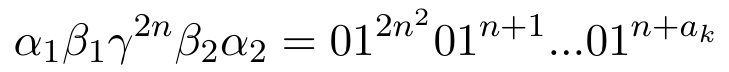

Extracted LaTeX (0.7589257590007037): \alpha_{1}\beta_{1}\gamma^{2n}\beta_{2}\alpha_{2}\ =01^{2n^{2}}(01^{n+1}...01^{n+a_{k}}


<IPython.core.display.Math object>

In [27]:
from pathlib import Path
from IPython.display import display, Math, Image

for img in list(Path("test_output1/Formula").glob("*.jpg")):
    print(f"Processing image: {img}")
    display(Image(img))
    with open(img, "rb") as f:
        data = f.read()
    res, elapse = model_latex(data)
    print(f"Extracted LaTeX ({elapse}): {res}")
    display(Math(res))

In [2]:
from ultralytics import YOLO

model_yolo = YOLO("ultralytics-YOLO-MFD/weights.pt")
pred = model_yolo.predict(
    #"test_images/t1_page_1.png",   # Image to predict
    "test_images/t3_page_2.png",   # Image to predict
    imgsz=1024,        # Prediction image size
    conf=0.2,          # Confidence threshold
    device="cuda:0"    # Device to use (e.g., 'cuda:0' or 'cpu')
)
pred[0].save_crop(save_dir="test_output2", file_name="detection")


image 1/1 /home/alexey/test/test_images/t3_page_2.png: 1024x736 34 embeddings, 2 isolateds, 45.0ms
Speed: 10.4ms preprocess, 45.0ms inference, 19.5ms postprocess per image at shape (1, 3, 1024, 736)


Processing image: test_output2/isolated/detection.jpg


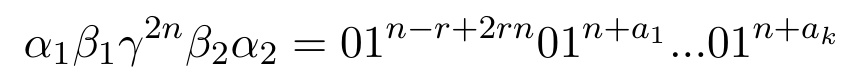

Extracted LaTeX (2.1814856800001508): \alpha_{1}\beta_{1}\gamma^{2n}\beta_{2}\alpha_{2}=01^{n-r+2r n}\bar{\Pi}_{n+a_{1}}^{n+a_{1}}...\bar{\Omega}_{n+a_{k}}^{n+a_{1}}\psi^{n+a_{1}}\psi^{n+a_{k}}\psi_{k}\psi_{k}\psi_{k}\psi_{k}\psi_{k}}^{n+a_{1}}


<IPython.core.display.Math object>

Processing image: test_output2/isolated/detection2.jpg


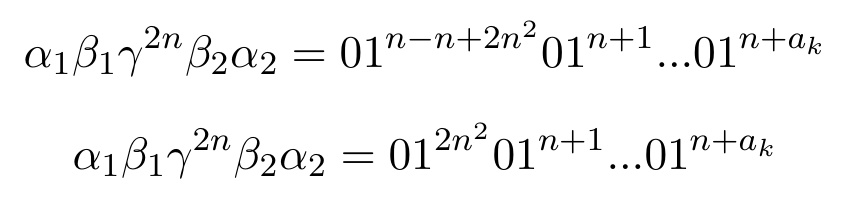

Extracted LaTeX (3.1070457880000504): \begin{array}{c}{{\displaystyle Q_{1}\beta_{1}\gamma^{2n}\beta_{2}{\cal Q}_{2}\Longrightarrow(\displaystyle0){}^{n-n+2n^{2}}(\displaystyle0){}^{n+1}...0{}^{1}}}\\ {{\displaystyle Q_{1}\beta_{1}\gamma^{2n}\beta_{2}{\cal Q}_{2}{\cal Q}_{2}\ =0{}^{2n^{2}}(\displaystyle01^{n+a_{k}})}}\end{array}


<IPython.core.display.Math object>

In [3]:
from pathlib import Path
from IPython.display import display, Math, Image

for img in list(Path("test_output2/isolated").glob("*.jpg")):
    print(f"Processing image: {img}")
    display(Image(img))
    with open(img, "rb") as f:
        data = f.read()
    res, elapse = model_latex(data)
    print(f"Extracted LaTeX ({elapse}): {res}")
    display(Math(res))

Processing image: test_output2/embedding/detection27.jpg


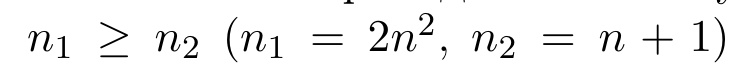

Extracted LaTeX (0.8468334720000712): \begin{array}{l}{{\displaystyle{\eta}_{1}~\le~n_{2}~\left(\eta_{1}~\equiv~2\eta^{2},~\eta_{2}~\ =~\eta+1\right)}}\end{array}\nonumber


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection31.jpg


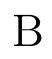

Extracted LaTeX (0.09368402900008732): \textstyle\bigcap{\mathcal{D}}


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection15.jpg


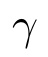

Extracted LaTeX (0.2160053220000009): {\mathbf{\delta}}^{\prime}\neq\langle\!\!\Sigma\rangle\!\langle\!\!\slash


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection18.jpg


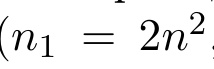

Extracted LaTeX (0.1979037039996001): \left(n_{1}\;=\;2n^{2}.


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection14.jpg


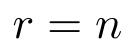

Extracted LaTeX (0.06482270800006518): r=n


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection29.jpg


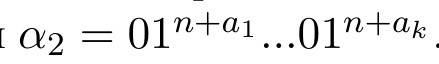

Extracted LaTeX (0.5162740290002148): [{\bf\nabla}\,Q_{2}\,\Longrightarrow\,[){\bf\nabla}^{n+a_{1}}...(9]^{n+a_{k}}.


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection6.jpg


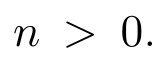

Extracted LaTeX (0.10864086700030384): n\;>\;0.


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection7.jpg


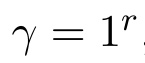

Extracted LaTeX (0.15378061999990678): \gamma=1^{r}


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection32.jpg


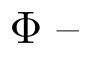

Extracted LaTeX (0.05227442900013557): \Phi


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection17.jpg


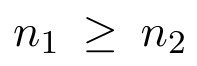

Extracted LaTeX (0.23675346599975455): n_{1}\ \geq\ n_{2}


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection8.jpg


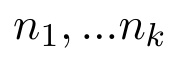

Extracted LaTeX (0.36505777399997896): {\mathcal{V}}(1_{1}\,,\,\cdot\cdot{\mathcal{U}}_{1}\,,\cdot\cdot\cdot\neq\,U_{k}\,.


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection22.jpg


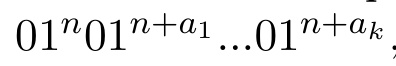

Extracted LaTeX (1.3450890139997682): \Theta\rfloor^{\,\eta}(\L^{\,\eta}(\L^{\alpha}(\L^{\alpha})_{\,\ \cdot\,\cdot\,\cdot}(\L^{\eta}+\L^{\alpha}}_{\,k\,\cdot\,\cdot\,\ \cdot\,\L}^{\,\eta}\,\longrightarrow(\L^{\eta}+\L^{\alpha})\,\longrightarrow\,.


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection34.jpg


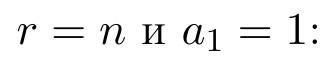

Extracted LaTeX (0.1780289299999822): r=n\textrm{u}a_{1}=1\cdotp


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection20.jpg


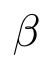

Extracted LaTeX (0.11623810800028878): \textstyle{\mathcal{O}}


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection16.jpg


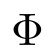

Extracted LaTeX (0.1450191009998889): {\mathcal{C}}(\mathbb{P})


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection21.jpg


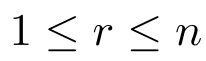

Extracted LaTeX (0.20027247699999862): \rfloor\,\,\ll\,\,\eta^{\star}\,\ll\,\,\eta\,


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection13.jpg


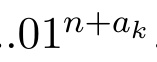

Extracted LaTeX (0.435518248000335): \O_{*}\Theta\rfloor m^{\underline{{{n}}}+\underline{{{a}}}_{\boldsymbol{k}}^{\underline{{{n}}}}~.


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection4.jpg


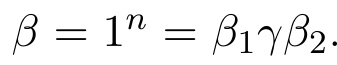

Extracted LaTeX (0.2567400530001578): \beta=\,1^{n}\,\equiv\,\beta_{1}\gamma\beta_{2}.


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection25.jpg


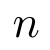

Extracted LaTeX (0.08608064200006993): \textstyle{\mathcal{Y}}


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection10.jpg


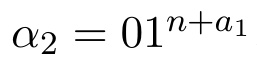

Extracted LaTeX (0.19524143499984348): Q_{2}=01^{n+a_{1}}


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection19.jpg


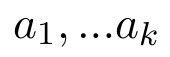

Extracted LaTeX (0.14183938699989085): a_{1},\ldots a_{k}


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection12.jpg


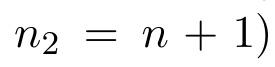

Extracted LaTeX (0.24217256500014628): n_{2}\;\underline{{{=\;+\!+\,+}\;1}}


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection5.jpg


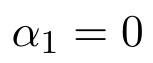

Extracted LaTeX (0.10453171600011046): \alpha_{1}=0


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection.jpg


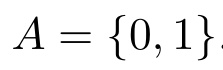

Extracted LaTeX (0.12615182900026412): A=\{0,1\}


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection3.jpg


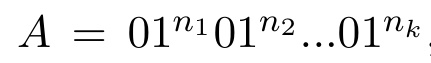

Extracted LaTeX (1.159149442999933): {\cal A}\ \ =\ \left(\right)\rfloor^{n_{1}}(\mathrm{}\ \!\left[\right]\vphantom{}^{n_{2}}\K{array}\right)\bot\right._{\cdot\cdot\cdot}\in\left(\mathrm{}\right]\vphantom{}\vphantom{}\right)}^{m_{k}}.


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection9.jpg


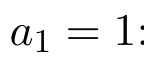

Extracted LaTeX (0.1374996029999238): a_{1}\equiv1\colon


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection23.jpg


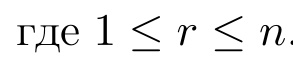

Extracted LaTeX (0.2719374869998319): \cap_{^{\gamma}\mathrm{I}\in\mathrm{1}}\leq r\leq n.


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection2.jpg


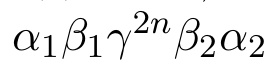

Extracted LaTeX (0.48398231700002725): {\cal G}\surd\bot\land_{\infty}\lor\cdots\land_{\infty}\overset{\circ}{\mathcal{D}}\land_{\infty}\lor\lnot


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection28.jpg


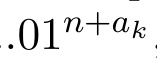

Extracted LaTeX (0.3092646249997415): _{\ast}\left(\right)\bot^{}\bot^{}\bot_{\~}^{-}


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection11.jpg


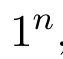

Extracted LaTeX (0.19292821799990634): \textstyle\sum^{\,}\!^{\mathcal{W}}\!\!\!_{:}


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection33.jpg


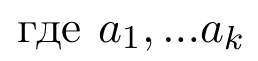

Extracted LaTeX (0.6524328599998626): \Pi_{\ell}{\mathrm{T}}(\mathbb{C}-\Omega\mathsf{I})_{\ell},\L{\mathsf{\mathsf{\iota}}}\ast\L{\mathsf{\Pi}}\longrightarrow\ \mathsf{\ 0}}\mathsf{I}


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection30.jpg


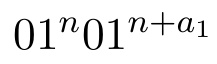

Extracted LaTeX (0.22009856900012892): \textstyle{01}^{n}(0,1+a_{1})


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection26.jpg


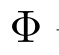

Extracted LaTeX (0.032997196999986045): \Phi


<IPython.core.display.Math object>

Processing image: test_output2/embedding/detection24.jpg


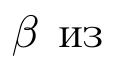

Extracted LaTeX (0.1152804569996988): \beta\ \ {\bf43}


<IPython.core.display.Math object>

In [4]:
from pathlib import Path
from IPython.display import display, Math, Image

for img in list(Path("test_output2/embedding").glob("*.jpg")):
    print(f"Processing image: {img}")
    display(Image(img))
    with open(img, "rb") as f:
        data = f.read()
    res, elapse = model_latex(data)
    print(f"Extracted LaTeX ({elapse}): {res}")
    display(Math(res))